In [ ]:
import os

if "visualization" in os.getcwd():
    os.chdir("..")

if "notebooks" in os.getcwd():
    os.chdir("..")
os.getcwd()

In [2]:
from src.dataset import register_default_datasets, DEFAULT_CLASS_NAMES
import numpy as np
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data import detection_utils as utils
from detectron2.utils.visualizer import Visualizer
import random
from src.utils.data import read_image
import matplotlib.pyplot as plt
from pathlib import Path
import collections
import pandas as pd

register_default_datasets()

In [3]:
use_collapsed = True

# Data statistics

In [4]:
def calc_aspect_ratio_of_annotation(annotation):
    a = np.array(annotation["bbox"]).reshape(2, 2)
    w, h = a[1] - a[0]
    return w, h

def plot_distributions(series, title=None):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].boxplot(series)
    ax[0].set_title("boxplot")
    ax[1].hist(series)
    ax[1].set_title("histogram")
    fig.suptitle(title)
    plt.show()
    
def dataset_to_df(name):
    dataset = DatasetCatalog.get(name)
    meta_dataset = MetadataCatalog.get(name)

    data = []
    columns = ["file_name", "image_width", "image_height", "label", "bbox_width", "bbox_height"]

    for item in dataset:
        file_name = Path(item["file_name"]).name
        image_width = item["width"]
        image_height = item["height"]

        for annotation in item["annotations"]:
            label = meta_dataset.thing_classes[annotation["category_id"]]
            bbox = np.array(annotation["bbox"]).reshape(2, 2)
            bbox_width, bbox_height = bbox[1] - bbox[0]
            bbox_width /= image_width
            bbox_height /= image_height

            data.append([file_name, image_width, image_height, label, bbox_width, bbox_height])

    df = pd.DataFrame(data, columns=columns)
    df["image_aspect_ratio"] = df["image_width"] / df["image_height"]
    df["bbox_aspect_ratio"] = df["bbox_width"] / df["bbox_height"]
    
    return df

def how_many_images_contain_each_class_at_least_ones(df):
    data = []
    total = len(df["file_name"].unique())
    for label in df["label"].unique():
        amount = len(df[df["label"] == label]["file_name"].unique())
        data.append([label, amount, amount / total])
        
    return pd.DataFrame(data, columns=["Label", "Amount", "Precentage"])

## Train

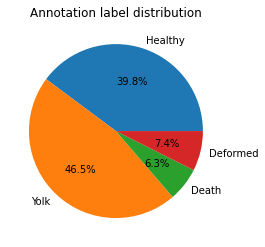

Counter({'Yolk': 452, 'Healthy': 387, 'Deformed': 72, 'Death': 61})


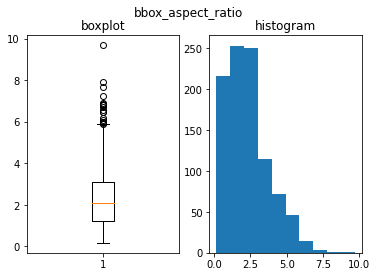

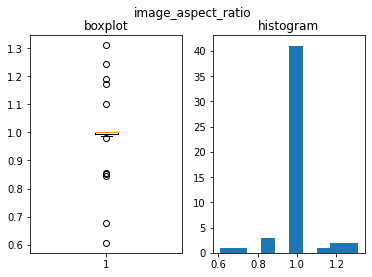

How many of the images contain at least one of the classes:


,Label,Amount,Precentage
0,Healthy,46,0.901961
1,Yolk,47,0.921569
2,Death,17,0.333333
3,Deformed,31,0.607843


In [5]:
name = "train_collapsed" if use_collapsed else "train"
df = dataset_to_df(name)

counts = collections.Counter(df["label"])
plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%')
plt.title("Annotation label distribution")
plt.show()
print(counts)


plot_distributions(df["bbox_aspect_ratio"], "bbox_aspect_ratio")
plot_distributions(list(df.groupby("file_name").agg({"image_aspect_ratio": "mean"})["image_aspect_ratio"]), "image_aspect_ratio")

print("How many of the images contain at least one of the classes:")
how_many_images_contain_each_class_at_least_ones(df)

## Validation

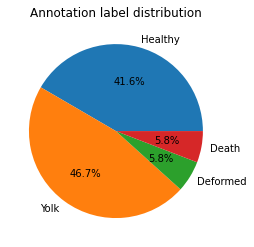

Counter({'Yolk': 128, 'Healthy': 114, 'Deformed': 16, 'Death': 16})


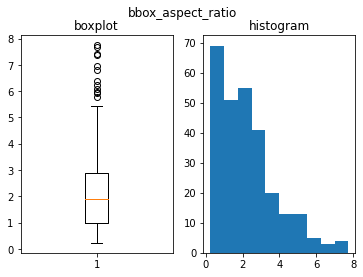

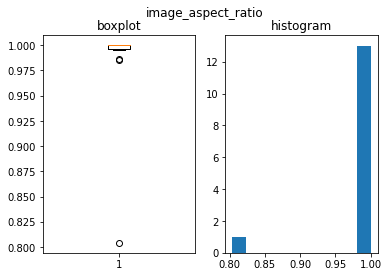

How many of the images contain at least one of the classes:


,Label,Amount,Precentage
0,Healthy,13,0.928571
1,Yolk,13,0.928571
2,Deformed,7,0.500000
3,Death,4,0.285714


In [6]:
name = "val_collapsed" if use_collapsed else "val"
df = dataset_to_df(name)

counts = collections.Counter(df["label"])
plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%')
plt.title("Annotation label distribution")
plt.show()
print(counts)


plot_distributions(df["bbox_aspect_ratio"], "bbox_aspect_ratio")
plot_distributions(list(df.groupby("file_name").agg({"image_aspect_ratio": "mean"})["image_aspect_ratio"]), "image_aspect_ratio")

print("How many of the images contain at least one of the classes:")
how_many_images_contain_each_class_at_least_ones(df)

## Test

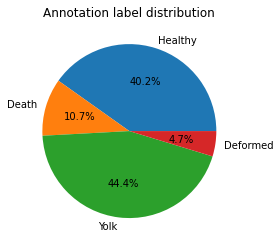

Counter({'Yolk': 104, 'Healthy': 94, 'Death': 25, 'Deformed': 11})


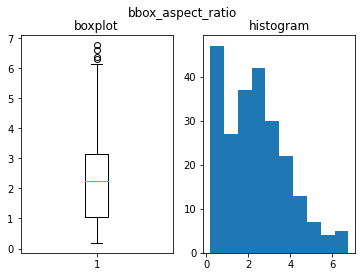

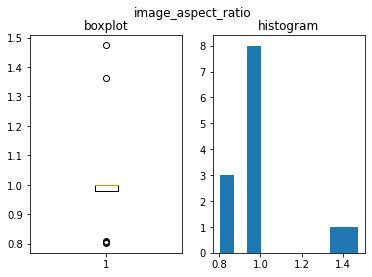

How many of the images contain at least one of the classes:


,Label,Amount,Precentage
0,Healthy,13,1.000000
1,Death,7,0.538462
2,Yolk,13,1.000000
3,Deformed,6,0.461538


In [7]:
name = "test_collapsed" if use_collapsed else "test"
df = dataset_to_df(name)

counts = collections.Counter(df["label"])
plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%')
plt.title("Annotation label distribution")
plt.show()
print(counts)


plot_distributions(df["bbox_aspect_ratio"], "bbox_aspect_ratio")
plot_distributions(list(df.groupby("file_name").agg({"image_aspect_ratio": "mean"})["image_aspect_ratio"]), "image_aspect_ratio")

print("How many of the images contain at least one of the classes:")
how_many_images_contain_each_class_at_least_ones(df)

# Data visualization

In [8]:
def plot_dataset_dict(dataset_dict, meta_dataset, figsize=(10, 10)):
    image = read_image(dataset_dict["file_name"])
    
    visualizer = Visualizer(image[:, :, ::-1], metadata=meta_dataset, scale=0.5)
    out = visualizer.draw_dataset_dict(dataset_dict)
    plt.figure(figsize=(10, 10))
    plt.imshow(out.get_image())
    plt.title(Path(dataset_dict['file_name']).name)
    plt.show()

## Training data

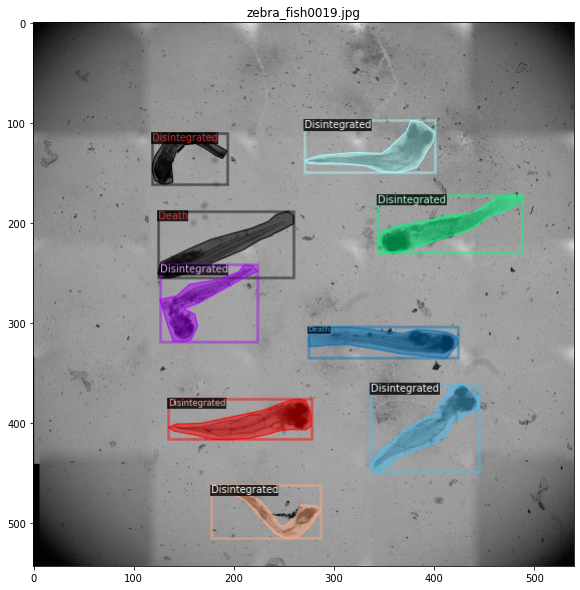

In [9]:
seed = 42
n_samples = 1
random.seed(seed)
name = "train"

dataset = DatasetCatalog.get(name)
meta_dataset = MetadataCatalog.get(name)

for dataset_dict in random.choices(dataset, k=n_samples):
    plot_dataset_dict(dataset_dict, meta_dataset)

## Validation dataset

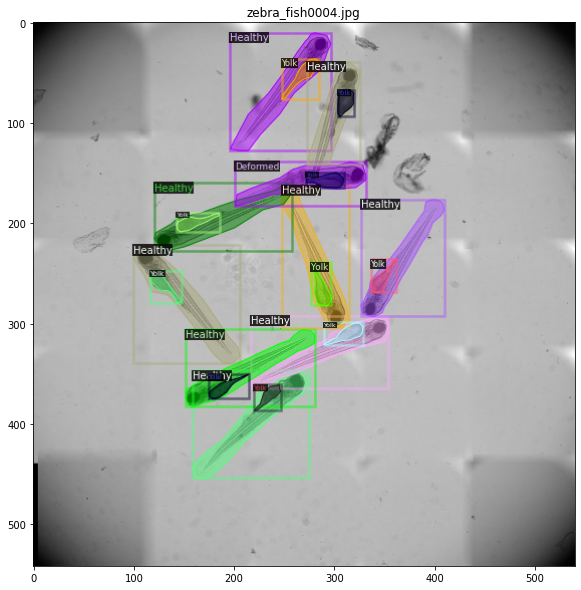

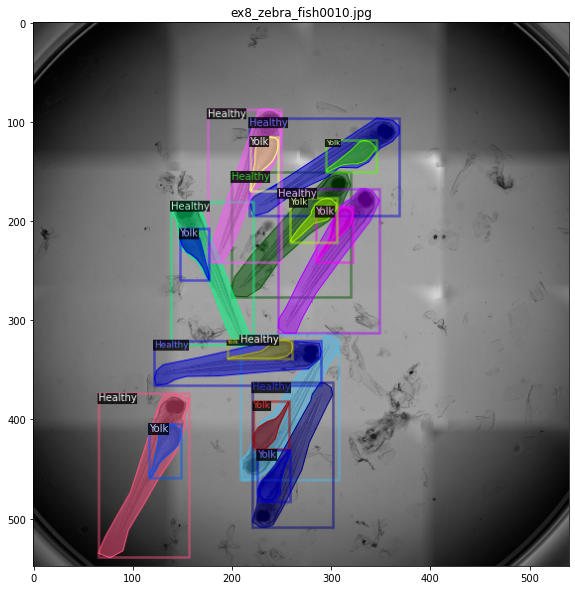

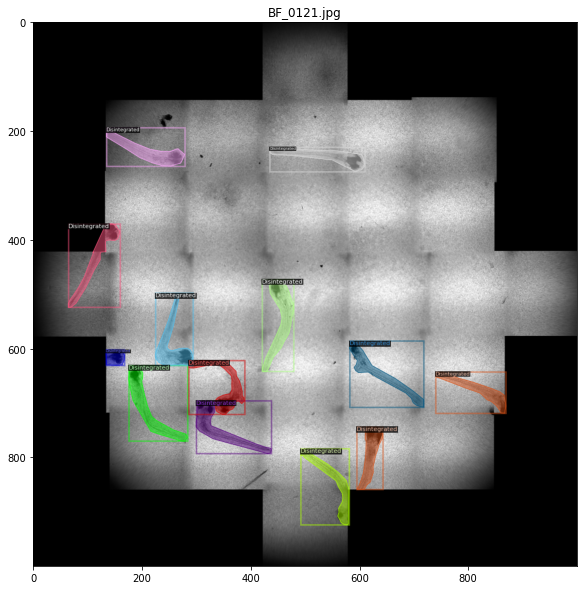

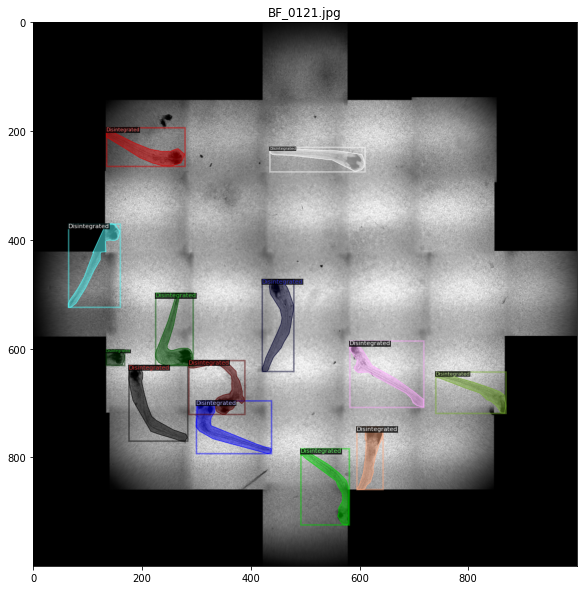

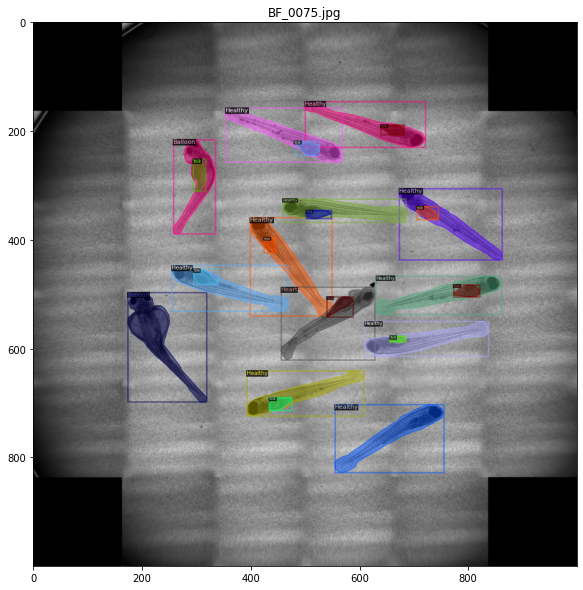

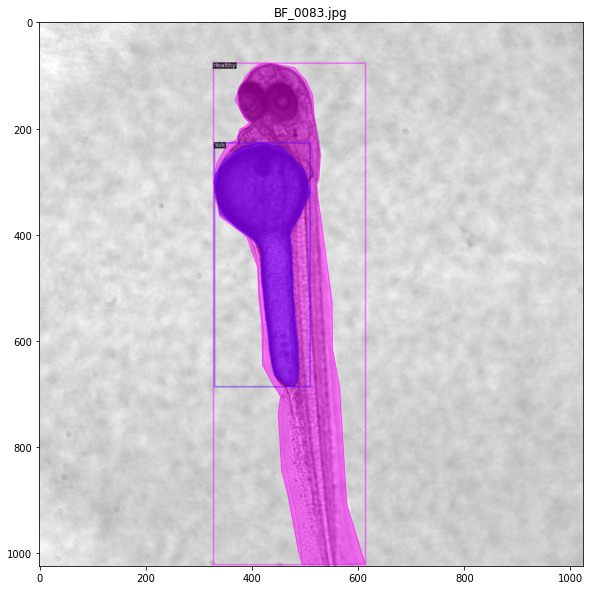

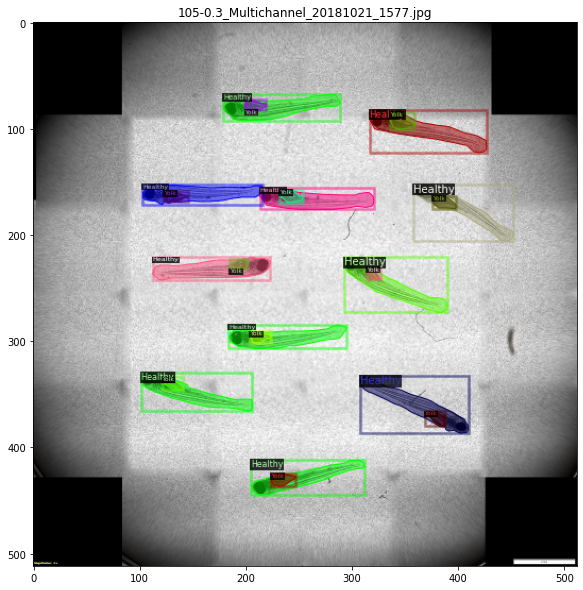

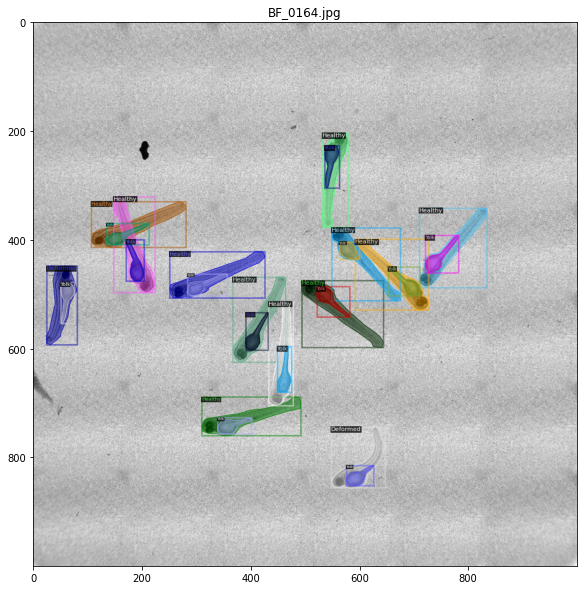

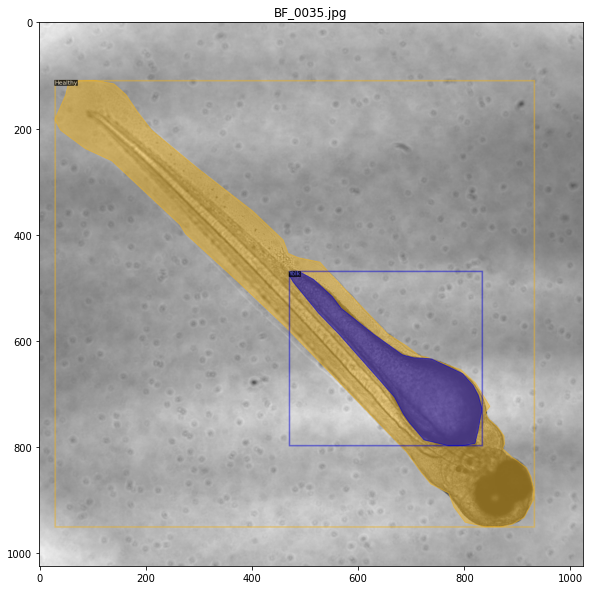

In [10]:
seed = 42
n_samples = 9
random.seed(seed)
name = "val"

dataset = DatasetCatalog.get(name)
meta_dataset = MetadataCatalog.get(name)

for dataset_dict in random.choices(dataset, k=n_samples):
    plot_dataset_dict(dataset_dict, meta_dataset)

## Test set

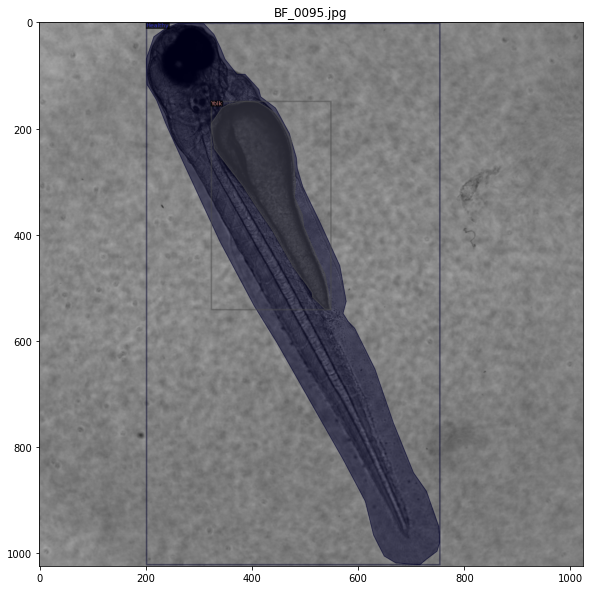

In [11]:
seed = 42
n_samples = 1
random.seed(seed)
name = "test"

dataset = DatasetCatalog.get(name)
meta_dataset = MetadataCatalog.get(name)

for dataset_dict in random.choices(dataset, k=n_samples):
    plot_dataset_dict(dataset_dict, meta_dataset)

# Data overlappath_other

In [12]:
import shelve
import imagehash
from PIL import Image
import itertools

hamming_distance = 3

db = collections.defaultdict(list)
hash_path_tuples = []

for name in DatasetCatalog.list():
    for item in DatasetCatalog.get(name):
        path = Path(item["file_name"])
        image = Image.open(path)
        h = imagehash.dhash(image)
      
        hash_path_tuples.append((h, path))
        

        

for (h_one, path_one), (h_other, path_other) in itertools.combinations(hash_path_tuples, r=2):
    if h_one - h_other < hamming_distance and path_one != path_other:
        print(f"These image are very similiar with HD={h_one - h_other }")
        print("-", path_one)
        print("-", path_other)
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
        ax1.imshow(read_image(path_one))
        ax2.imshow(read_image(path_other))
        plt.show()

    

In [13]:
import copy
def mapper(dataset_dict):
    # Implement a mapper, similar to the default DatasetMapper, but with your own customizations
    dataset_dict = copy.deepcopy(dataset_dict)  # it will be modified by code below
    image = utils.read_image(dataset_dict["file_name"], format="BGR")
    
    data = dict()

    data["height"]  = dataset_dict["height"]
    data["width"]  = dataset_dict["width"]
    data["file_name"] = dataset_dict["file_name"]
    data["image"] = image

    instances = utils.annotations_to_instances(dataset_dict["annotations"], image.shape[:2])
    data["instances"] = utils.filter_empty_instances(instances)
    
    return data

In [14]:
dataset =  DatasetCatalog.get("train")
item = dataset[0]
item["annotations"][0]["bbox"], item["annotations"][1]["bbox"]

([124, 250, 337, 291], [431, 88, 645, 136])

In [15]:
from detectron2.structures.boxes import pairwise_iou

ious = []
for item in dataset:
    gt_boxes = mapper(item)["instances"].gt_boxes
    for i in range(len(gt_boxes)):
        for j in range(i + 1, len(gt_boxes)):
            iou = float(pairwise_iou(gt_boxes[i], gt_boxes[j]))
            ious.append(iou)

ious = np.array(ious)            
np.min(ious), np.median(ious), np.max(ious)

(0.0, 0.0, 0.5249649286270142)

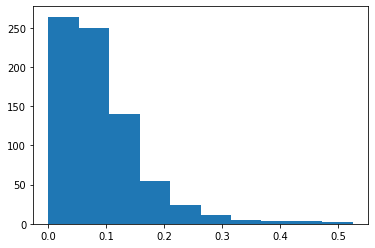

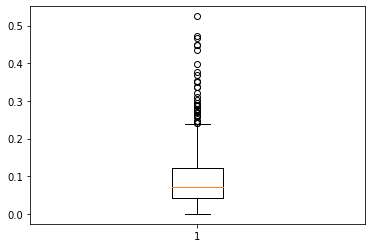

In [16]:
plt.hist(ious[ious > 0])
plt.show()

plt.boxplot(ious[ious > 0])
plt.show()

In [17]:
MetadataCatalog.get("train").thing_classes

['Healthy',
 'Deformed',
 'Death',
 'Yolk',
 'Heart',
 'Yolk_Deformed',
 'Balloon',
 'Disintegrated',
 'Undeveloped']

<AxesSubplot:xlabel='bbox_width', ylabel='bbox_height'>

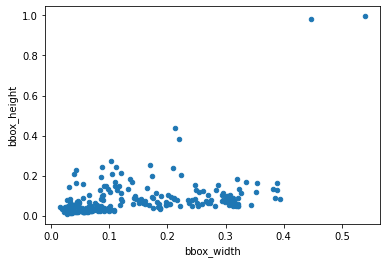

In [18]:
df[["bbox_width", "bbox_height"]].plot.scatter(x="bbox_width", y="bbox_height")

In [19]:
X = df[["bbox_width", "bbox_height"]].values

In [20]:
Aspects = X[:, 0] / X[:, 1]

In [21]:
from sklearn.cluster import AgglomerativeClustering
k = 3
kmeans = AgglomerativeClustering(n_clusters=k).fit(X)

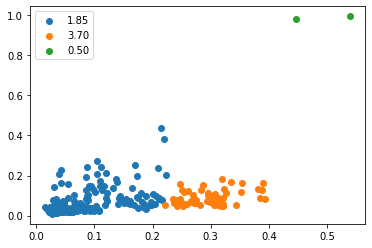

In [22]:
for i in range(k):
    x = X[kmeans.labels_ == i]
    avg_aspect = np.median(x[:, 0] / x[:, 1])
    plt.scatter(x[:, 0], x[:, 1], label="{:.2f}".format(avg_aspect))
plt.legend()
plt.show()

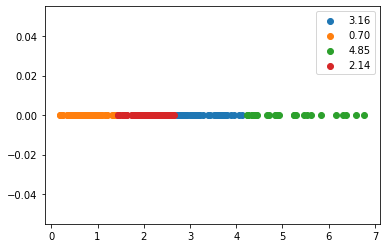

In [23]:
from sklearn.cluster import KMeans
k = 4
Z = (Aspects - np.min(Aspects)) / (np.max(Aspects) - np.min(Aspects))
kmeans = KMeans(n_clusters=k, random_state=0).fit(Z.reshape(-1, 1))

for i in range(k):
    x = Aspects[kmeans.labels_ == i]
    plt.scatter(x, np.zeros_like(x), label="{:.2f}".format(np.median(x)))
    
plt.legend()
plt.show()

In [24]:
np.min(Aspects), np.max(Aspects)

(0.18604651162790697, 6.7704269864988165)

In [25]:
np.min(Z), np.max(Z)

(0.0, 1.0)

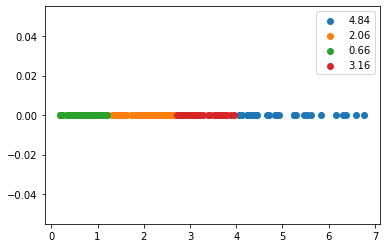

In [26]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
k = 4
Z = (Aspects - np.min(Aspects)) / (np.max(Aspects) - np.min(Aspects))
kmeans = AgglomerativeClustering(n_clusters=k,).fit(Aspects.reshape(-1, 1))

for i in range(k):
    x = Aspects[kmeans.labels_ == i]
    plt.scatter(x, np.zeros_like(x), label="{:.2f}".format(np.median(x)))
    
plt.legend()
plt.show()